In [1]:
words = open('names.txt').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

- What's likely to follow a character ? 
- Lot's of examples to build the structure

In [3]:
# 2-mers, bi-gram
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [4]:
words[0]

'emma'

## character bigrams for the first word

In [5]:
# include start and end special token
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [6]:
# and for more words
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [7]:
# let's keep track of bigram counts, so we can have basic statistics
b = {}
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1, ch2)
print(b)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>
{('<S>', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '<E>'): 3, ('<S>', 'o'): 1, ('o', 'l'): 1, ('l', 'i'): 1, ('i', 'v'): 1, ('v', 'i'): 1, ('i', 'a'): 1, ('<S>', 'a'): 1, ('a', 'v'): 1, ('v', 'a'): 1}


In [8]:
# let's keep track of bigram counts for all words
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)
print(b)

{('<S>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<E>'): 6640, ('<S>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<S>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<S>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<S>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<S>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<E>'): 3983, ('<S>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<S>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<E>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<E>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345,

In [9]:
# 10 most common ones
sorted(b.items(), key = lambda x: -x[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [10]:
# 10 least common ones
sorted(b.items(), key = lambda x: x[1])[:10]

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1)]

In [11]:
## lets represent this in pytorch array instead

In [12]:
# prepare a index for the character vocabulary so we can index into an array
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [13]:
itos = {i:s for s,i in stoi.items()}
#itos

In [14]:
import torch

In [15]:
# 26 letters in alphabet, 1 start token, 1 end token = 28 tokens
# 28 tokens first char and second char
N = torch.zeros((28, 28), dtype=torch.int32)

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [16]:
# lets output the matrix in something nice, use a matplotlib heat map-ish

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

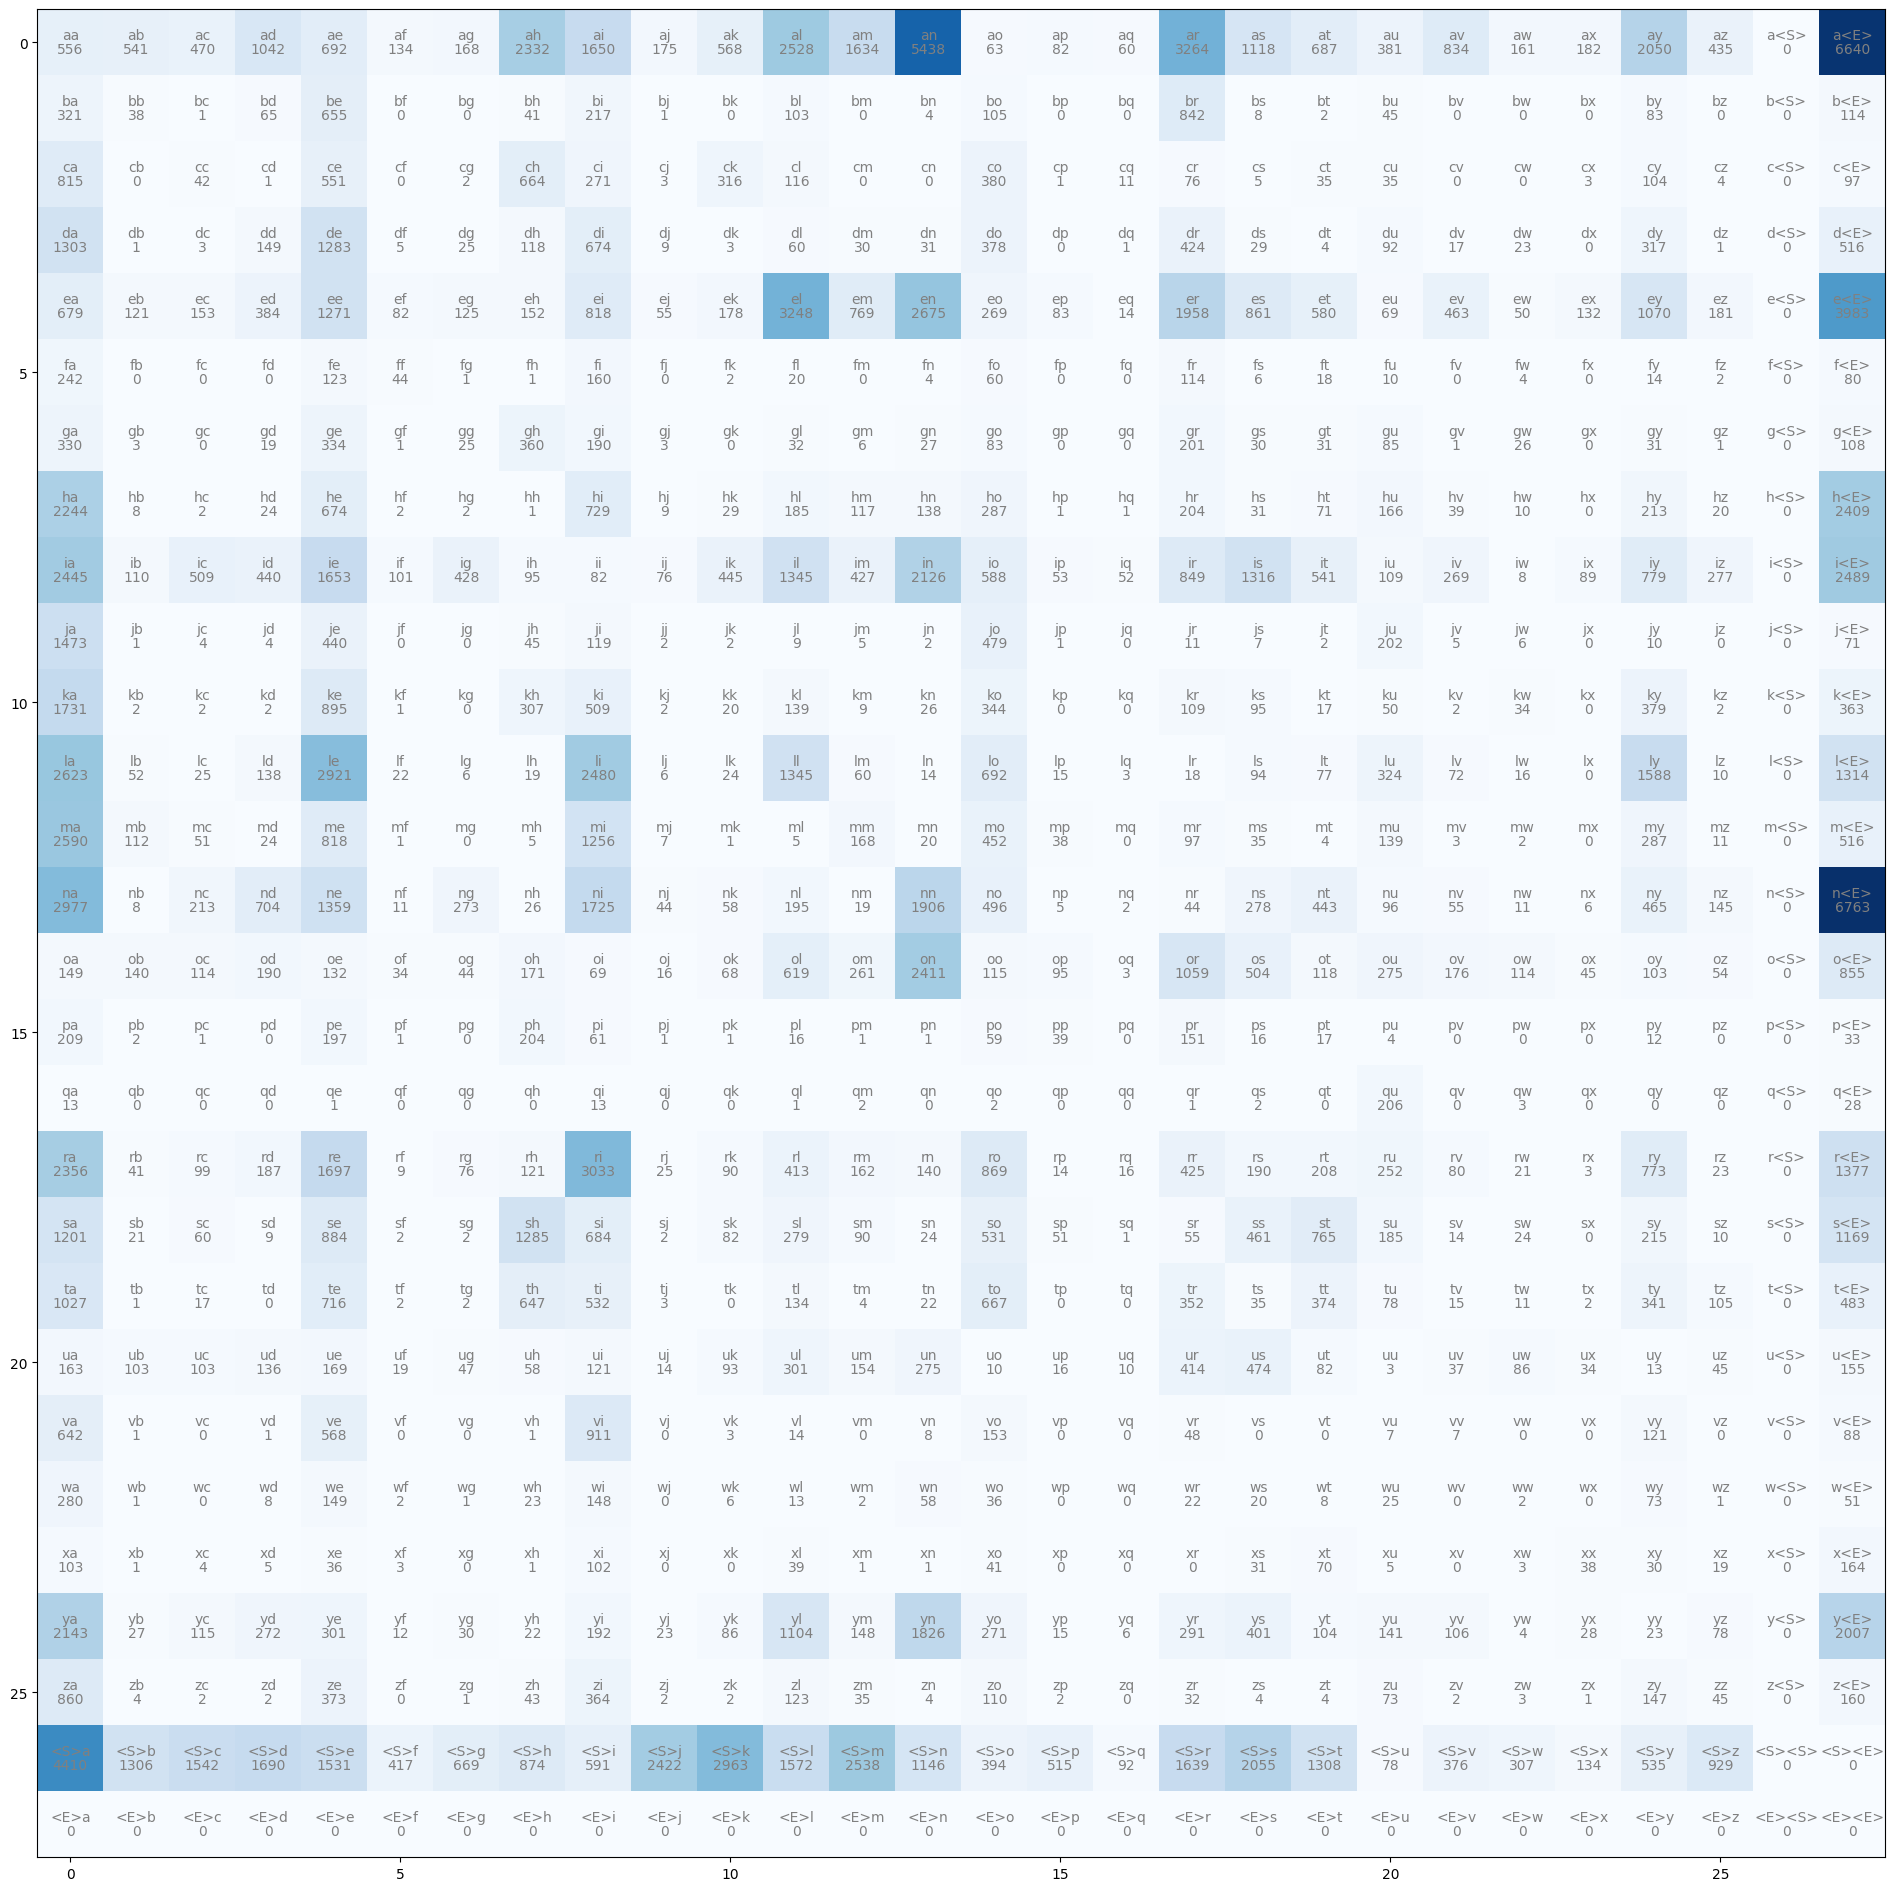

In [18]:
plt.figure(figsize=(24,24))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        bigramstr = f"{itos[i]}{itos[j]}"
        plt.text(j, i, bigramstr, ha="center", va="bottom", color='gray')
        # get the item from the tensor
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray')

In [19]:
## let's get rid of spurious row and col that's always zero,
## bigrams starting with end token - never possible
## bigrams ending with start token - never possible

In [20]:
# let's only have one special token (.) instead of <S>, <E>
# and let's have it at index 0, offset others by 1
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [21]:
# 26 letters in alphabet, 1 special token = 27 tokens
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

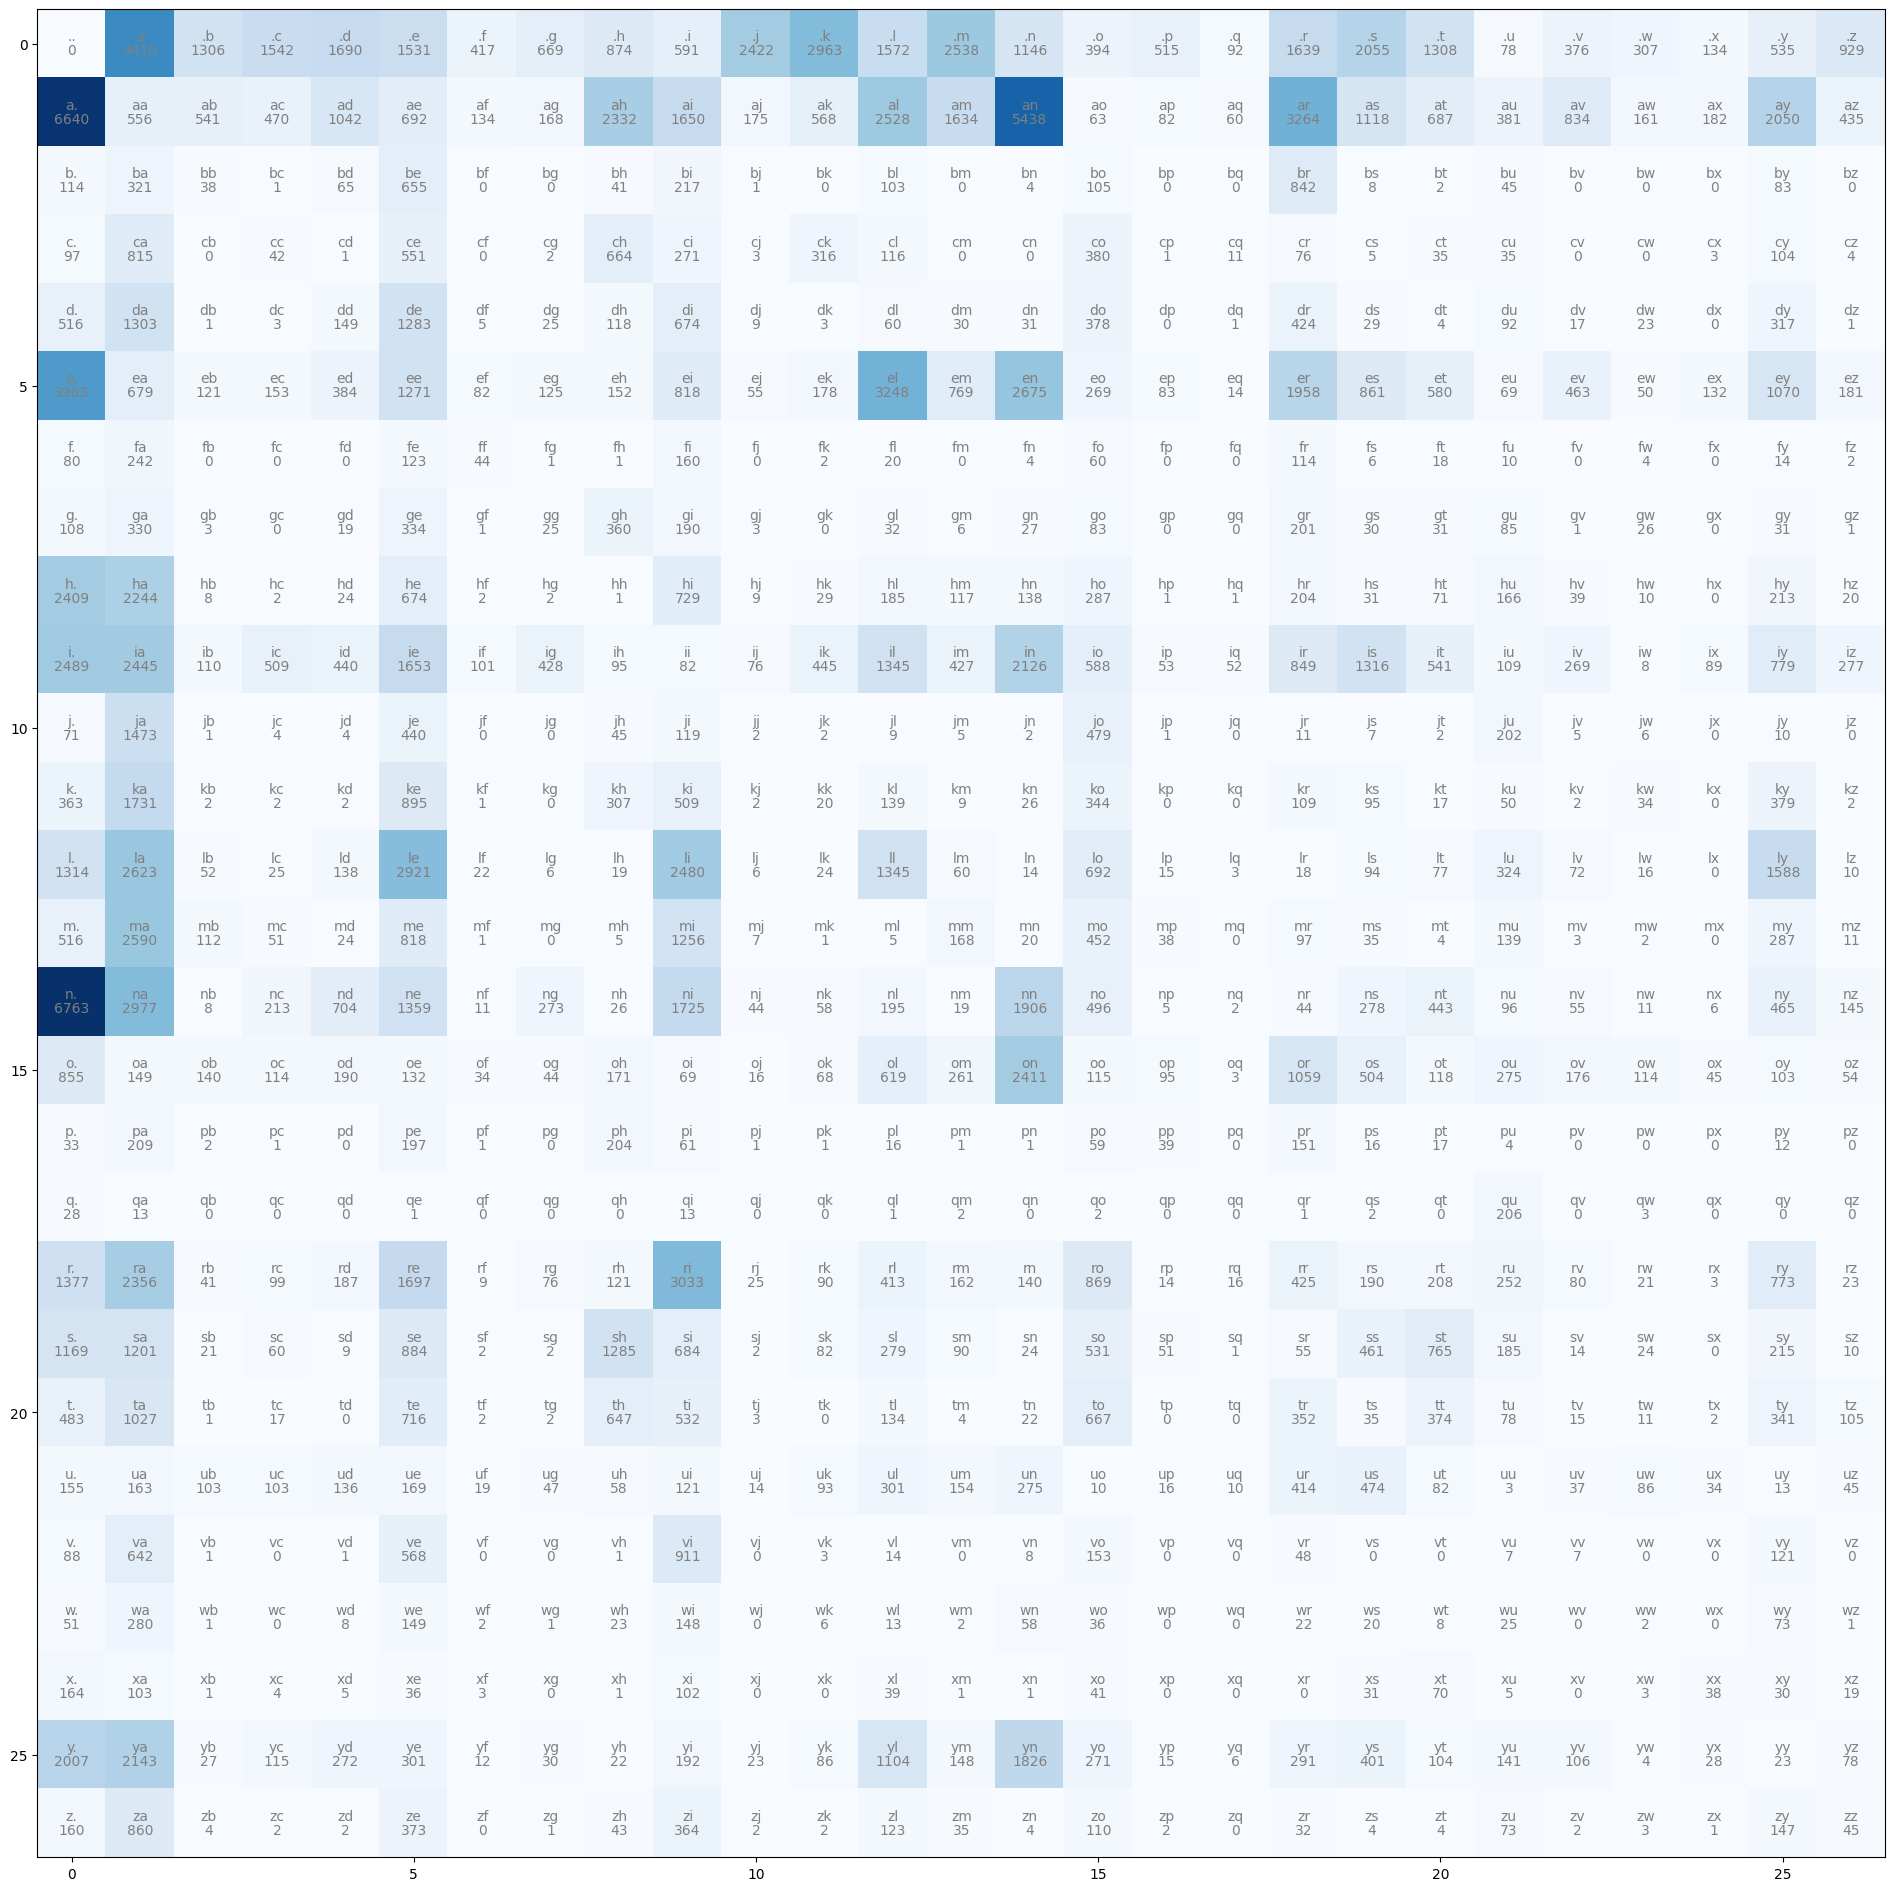

In [22]:
plt.figure(figsize=(24,24))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        bigram = itos[i] + itos[j]
        plt.text(j, i, bigram, ha="center", va="bottom", color='gray')
        # get the item from the tensor
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray')

In [23]:
# we'll start sampling from these counts -> probabilities soon
# refresh a bit about multinomial distribution
# https://www.youtube.com/watch?v=syVW7DgvUaY

In [24]:
# for the start character
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [25]:
# we want to sample from these, so let's convert that to probabilities by normalising them
p = N[0].float() # first convert to float
p = p / p.sum()  # then normalise them
p, p.sum()

(tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]),
 tensor(1.))

In [26]:
# pytorch generator with manual seed and multinomial samplinig

g = torch.Generator().manual_seed(2147483647)
x = torch.rand(3, generator=g)
x = x / x.sum()
x                                 

tensor([0.6064, 0.3033, 0.0903])

In [27]:
# the samples should have ~60% 0s, 30% 1s & 10% 2s, as we can see in the probability above

In [28]:
torch.multinomial(x, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [29]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [30]:
# let's loop and sample as we go now
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [31]:
# let's start vectorising
# build a probability tensor similar to N, the bigram count tensor

P = N.float()

In [32]:
P.shape

torch.Size([27, 27])

In [33]:
P.sum(0, keepdim=True), P.sum(0, keepdim=True).shape

(tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
          17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
          12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]]),
 torch.Size([1, 27]))

In [34]:
P.sum(0, keepdim=False), P.sum(0, keepdim=False).shape

(tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]),
 torch.Size([27]))

In [35]:
# this is what we want, sum over the rows and get a column vector
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [36]:
P /= P.sum(1, keepdims=True)
P[0].sum(), P[:,0].sum()

(tensor(1.), tensor(3.0222))

In [37]:
# let's loop and sample as we go now
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        # vectorize here
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


## time to figure out the quality of this model - loss function

In [38]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

.e:  0.0478 -3.0408
em:  0.0377 -3.2793
mm:  0.0253 -3.6772
ma:  0.3899 -0.9418
a.:  0.1960 -1.6299
.o:  0.0123 -4.3982
ol:  0.0780 -2.5508
li:  0.1777 -1.7278
iv:  0.0152 -4.1867
vi:  0.3541 -1.0383
ia:  0.1381 -1.9796
a.:  0.1960 -1.6299
.a:  0.1377 -1.9829
av:  0.0246 -3.7045
va:  0.2495 -1.3882
a.:  0.1960 -1.6299


In [39]:
1/27.0

0.037037037037037035

In [40]:
# Any prob above the number means that we are learning useful stuff
# In fact on the training set the probability should be as high as 1.0 if the model has learnt well
# To summarize all these probabilities, something called likelihood is used
# Likelihood is the product of all these probablities and should be as high as possible(1 being max obv.)
# that's the probability of the entire dataset assigned by the model, also the quality of the model
# but since these numbers are 0-1, the product becomes a very small numbers
# that's why we prefer to work with log likelihood
# log(a*b*c) = log(a) + log(b) + log(c)
# convienient then

# however when product of probabilities is 1, log likelihood is zero
# and when the product < 1, log likehood becomes more negative
# we don't actually want that, instead we want something of a Loss function
# something we can minimize, lower Loss is better
# and that's why we pick negative log likelihood
# nll is a very nice loss function
# the lowest it can get is 0, and the higher it is the worse the predictions
# for convenience, the nll is normalised sometimes

In [41]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'log likelihood: {log_likelihood}')
nll = - log_likelihood
print(f'negative log likelihood: {nll}')
print(f'norm. negative log likelihood: {nll/n}')

.e:  0.0478 -3.0408
em:  0.0377 -3.2793
mm:  0.0253 -3.6772
ma:  0.3899 -0.9418
a.:  0.1960 -1.6299
.o:  0.0123 -4.3982
ol:  0.0780 -2.5508
li:  0.1777 -1.7278
iv:  0.0152 -4.1867
vi:  0.3541 -1.0383
ia:  0.1381 -1.9796
a.:  0.1960 -1.6299
.a:  0.1377 -1.9829
av:  0.0246 -3.7045
va:  0.2495 -1.3882
a.:  0.1960 -1.6299
log likelihood: -38.78563690185547
negative log likelihood: 38.78563690185547
norm. negative log likelihood: 2.424102306365967


In [42]:
# lower the normalised negative log likelihood the better our model would be
# that's the quality of probablities assigned by the model
# the job of our training is to find the parameters that would minimize the nll loss

In [43]:
# Now let's check this over the entire dataset

In [44]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'log likelihood: {log_likelihood=}')
nll = - log_likelihood
print(f'negative log likelihood: {nll}')
print(f'norm. negative log likelihood: {nll/n}')

log likelihood: log_likelihood=tensor(-559891.7500)
negative log likelihood: 559891.75
norm. negative log likelihood: 2.454094171524048


In [45]:
# we could use this the check what the possibility would be for a word

In [46]:
log_likelihood = 0.0
n = 0
for w in ["suvash"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'log likelihood: {log_likelihood=}')
nll = - log_likelihood
print(f'negative log likelihood: {nll}')
print(f'norm. negative log likelihood: {nll/n}')

.s:  0.0642 -2.7465
su:  0.0228 -3.7800
uv:  0.0118 -4.4395
va:  0.2495 -1.3882
as:  0.0330 -3.4114
sh:  0.1585 -1.8418
h.:  0.3163 -1.1510
log likelihood: log_likelihood=tensor(-18.7585)
negative log likelihood: 18.75851821899414
norm. negative log likelihood: 2.67978835105896


In [47]:
# now try out a weird combination and see that the model blows up

In [48]:
log_likelihood = 0.0
n = 0
for w in ["suvqash"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'log likelihood: {log_likelihood=}')
nll = - log_likelihood
print(f'negative log likelihood: {nll}')
print(f'norm. negative log likelihood: {nll/n}')

.s:  0.0642 -2.7465
su:  0.0228 -3.7800
uv:  0.0118 -4.4395
vq:  0.0000 -inf
qa:  0.0478 -3.0409
as:  0.0330 -3.4114
sh:  0.1585 -1.8418
h.:  0.3163 -1.1510
log likelihood: log_likelihood=tensor(-inf)
negative log likelihood: inf
norm. negative log likelihood: inf


In [49]:
# because vq is very unlikely to happen, the probablity exactly 0 according the bigram model, log likelihood being inf
# this is not desirable
# so we'll have to "fix" these 0 probabilities in the model with fake counts
# we'll do a model smoothing by adding a count to every bigram

In [50]:
# adding a count ensures that there never will be a case of 0, the more you add the more the model smoothens
P = (N+1).float()
P /= P.sum(1, keepdims=True)
P[0].sum(), P[:,0].sum()

(tensor(1.), tensor(3.0023))

In [51]:
# Now let's try that again

In [52]:
log_likelihood = 0.0
n = 0
for w in ["suvqash"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'log likelihood: {log_likelihood=}')
nll = - log_likelihood
print(f'negative log likelihood: {nll}')
print(f'norm. negative log likelihood: {nll/n}')

.s:  0.0641 -2.7468
su:  0.0229 -3.7779
uv:  0.0120 -4.4214
vq:  0.0004 -7.8633
qa:  0.0468 -3.0614
as:  0.0330 -3.4113
sh:  0.1581 -1.8444
h.:  0.3153 -1.1542
log likelihood: log_likelihood=tensor(-28.2807)
negative log likelihood: 28.28070068359375
norm. negative log likelihood: 3.5350875854492188


In [53]:
# still suprising to the model but not infinity anymore